# Análisis de hipótesis para tienda en línea

Para aumentar los ingresos de una gran tienda en línea, el departamento de marketing tiene una lista de hipótesis que estudiaremos en el desarrollo de este informe.

La estructura del análisis seguirá los siguientes puntos en el mismo orden:

- Priorización de hipótesis.

- Ejecución de un test A/B.

- Análisis de los resultados.


A continuación, detallamos los tópicos abarcados durante el proyecto:


**Tabla de contenidos:**

**PRIMERA PARTE: PRIORIZACIÓN DE HIPÓTESIS**

 **1. Inicialización:**
 
    - Carga de datos
    - Descripción de los datos
    - Conclusiones preliminares
    
 **2. Preprocesamiento de datos:**
 
    - Cambio de nombre a columnas
 
 **3. Análisis de datos:**
 
    - Framework ICE
    - Framework RICE
    - Conclusiones de priorización de hipótesis
    - Resultado final
    
**SEGUNDA PARTE: ANÁLISIS DE TEST A/B**

 **4. Inicialización**
 
    - Carga de datos
    - Descripción de datos
    - Conclusiones previas al preprocesamiento
    
 **5. Preprocesamiento**
 
    - Comprobación de duplicados
    - Snake case
    - Cambio de tipos de datos
    - Usuarios y grupos de testeo
    - Conclusiones al preprocesamiento
    
 **6. Análisis de datos**
 
    - Planteamiento de interrrogantes
    - Orden de análisis
    - Datos acumulados
    - Diferencias relativas
    - Tasas de conversión
    - Dispersión de los datos
    - Significancia estadística
    - Criterios usados para datos anómalos
    - Significancia en datos filtrados
    - Decisión basada en los resultados
 
  **7. Conclusiones finales**
    

## Primera parte: Inicialización

Para comenzar, trabajaremos con nueve hipótesis y sus respectivas evaluaciones contenidas en el archivo *hyphotheses.csv*.

In [1]:
# Cargamos las librerías
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Carga de datos

Descargamos el archivo que contiene las hipótesis junto a sus respectivas evaluaciones:

In [2]:
# Cargamos los datos de las hipótesis
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
#Vemos la información de los datos
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Descripción de los datos

**Los datos se dividen en 5 columnas:**

**1. Hypothesis:**

    - Descripción: breves descripciones de las hipótesis.
    - Tipo de datos: Object.

**2. Reach:**

    - Descripción: alcance del usuario, en una escala del uno a diez.
    - Tipo de datos: int64.
    
**3. Impact:**

    - Descripción: impacto en los usuarios, en una escala del uno al diez.
    - Tipo de datos: int64.
    
**4. Confidence:**

    - Descripción: confianza en la hipótesis, en una escala del uno al diez.
    - Tipo de datos: int64.
    
**5. Effort:**

    - Descripción: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
    - Tipo de datos: int64.

Nuestro dataset tiene **9 filas de registros (una para cada hipótesis)** en la que se describen en escala de 1 al 10 las características de: **Reach (alcance del usuario), Impact (impacto en los usuarios), Confidence (confianza en la hipótesis) y Effort (recursos necesarios para probar cada hipótesis).**

Visualizamos la tabla:

In [4]:
# Configuramos ancho de columnas para que aparezca toda la descripción de las hipótesis
pd.set_option('display.max_colwidth', None)

In [5]:
# Dataset 1
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


**Primera hipótesis:**
- *Agregar dos nuevos canales para atraer tráfico. Esto traerá un 30% más de usuarios.*

**Segunda hipótesis:**
- *Lanzar nuestro propio servicio de entrega. Esto acortará el tiempo de entrega.*

**Tercera hipótesis:**
- *Agregar bloques de recomendación de productos al sitio de la tienda. Esto aumentará la conversión y el tamaño promedio de compra.*

**Cuarta hipótesis:**
- *Cambiar la estructura de categorías. Esto aumentará la conversión ya que los usuarios encontrarán los productos que buscan más rápidamente.*

**Quinta hipótesis:**
- *Cambiar el color de fondo en la página principal. Esto aumentará la participación de los usuarios.*

**Sexta hipótesis:**
- *Agregar una página de revisión del cliente. Esto aumentará el número de pedidos.*

**Séptima hipótesis:**
- *Mostrar banners con ofertas y rebajas actuales en la página principal. Esto impulsará la conversión.*

**Octava hipótesis:**
- *Añadir un formulario de suscripción a todas las páginas principales. Esto ayudará a compilar una lista de correos.*

**Novena hipótesis:**
- *Lanzar una promoción que otorga a los usuarios descuentos en sus cumpleaños.*

### Conclusiones previas al preprocesamiento

Tenemos nueve hipótesis claramente entendibles que presentan cuatro características en la escala del 1 al 10. Algunas cosas que podemos notar:

- **Todas las características presentan valores correctos de acuerdo a la escala establecida para todas las hipótesis.**

- Tanto la descripción como características presentan tipos de datos correctos (object e int64).

- No existen datos ausentes.

El único mínimo cambio a esta tabla para facilitar el trabajo con ella, será aplicar snake case para los nombres de las columnas.

## Preprocesamiento: cambio de nombre a columnas

In [6]:
# Vemos los nombres de las columnas a cambiar
hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [7]:
# Cambiamos los nombres a minúsculas
hypotheses.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']

Tenemos listos nuestros datos para trabajar con ellos. Recordamos que solo hemos hecho dos cambios:
- Cambiar el límite de ancho para visualizar mejor las hipótesis.
- Cambiar nombres de las columnas a minúsculas.

## Análisis de datos

Necesitamos mejorar los ingresos para la tienda y para eso disponemos de 9 hipótesis de como hacerlo. No podemos probar todas estas hipótesis ya que significarían un costo muy alto, pero sí, podemos priorizar las hipótesis. 

**Algunas interrogantes que surgen en base a esto son:**

- *¿Cómo sabemos cuál hipótesis puede ser más útil?*
- *¿Cuáles deberíamos dejar de lado?*


Para trabajar en estas preguntas contamos con indicadores de una de las formas más populares de priorizar problemas: **ICE y RICE**. 

- **Impact:** medida en que afecta cualquier cambio a los usuarios, su experiencia y satisfacción con el producto/servicio.
- **Confidence:** qué tan seguro estamos de que el producto/servicio afectará de tal manera (seguridad en las hipótesis).
- **Effort:** cuánto costará probar las hipótesis.

A esto le agregamos otro parámetro para la versión modificada (RICE):
- **Reach:** cuántos usuarios se verán afectados por la actualización que queremos introducir.


**Ya que contamos con estos datos, la forma de trabajar el análisis será la siguiente:**

- Aplicaremos el framework ICE para priorizar nuestras hipótesis y así ordenarlas de forma descendente para visualizar claramente de la más a menos importante.

- Luego aplicaremos el framework RICE para priorizar hipótesis y compararémos los resultados con los anteriores.


### Framework ICE

Calcularémos el parámetro ICE para todas las hipótesis y agregaremos los valores obtenidos a la tabla existente.

In [8]:
# Creamos una nueva columna
hypotheses['ICE'] = (
    (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort'])

# Mostramos los valores ordenados de forma descendente
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending= False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


**El ICE muestra que la hipótesis más prometedora es la novena:** 

"*Lanzar una promoción que otorga a los usuarios descuentos en sus cumpleaños."*

Otras hipótesis destacables en orden son: 
- La primera: "*Añadir dos nuevos canales para atraer tráfico".*
- La octava: "*Añadir un formulario de suscripción a todas las páginas principales".*
- La séptima: "*Mostrar banners con ofertas y rebajas actuales en la página principal".*

### Framework RICE

Al igual que con ICE, calcularémos RICE para todas las hipótesis y agregaremos los valores obtenidos a la tabla existente.

In [9]:
# Creamos una nueva columna
hypotheses['RICE'] = (
    (hypotheses['reach'] * hypotheses['impact']* hypotheses['confidence']) / hypotheses['effort'])

# Mostramos los valores ordenados de forma descendente
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending= False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0



**El ranking de mejores hipótesis de acuerdo a RICE queda conformado de la siguiente manera:**

**Primer lugar; octava hipótesis:** "*Añadir un formulario de suscripción a todas las páginas principales".* 

De acuerdo a ICE, antes había alcanzado el tercer lugar.

**Segundo lugar; tercera hipótesis:** "*Agregar bloques de recomendación de productos al sitio de la tienda.".*


**Tercer lugar; primera hipótesis:** "*Añadir dos nuevos canales para atraer tráfico".*

De acuerdo a ICE, antes había alcanzado el segundo lugar.

**Cuarto lugar; séptima hipótesis:** "*Mostrar banners con ofertas y rebajas actuales en la página principal".*

De acuerdo a ICE, también se encuentra en cuarto lugar esta ocasión.

### Conclusiones de la priorización de hipótesis

La priorización de hipótesis cambia de acuerdo al framework elegido.

**En el caso de RICE, ya no encontramos a la novena hipótesis como la mejor opción. Esto se debe a su bajo valor de alcance (solo 1), siendo la hipótesis de menor alcance entre todas.**

Para RICE, la nueva hipótesis que entra a los primeros puestos es la tercera; esto se explica por su alto valor de alcance (8).

Tanto la primera, séptima y octava se repiten como las más prometedoras. Analicemos estas hipótesis:


**Primera hipótesis:** "*Añadir dos nuevos canales para atraer tráfico".*

- ICE: segundo lugar.
- RICE: tercer lugar.

 
- Su valor de **alcance es solo 3** mientras que el de **impacto llega a 10, confianza 8 y esfuerzo 6**. Con esto se entiende claramente que el **valor alto de ICE conseguido se debe al alto impacto y buena confianza que otorga la hipótesis**. El esfuerzo requerido es medio y el valor de alcance es bajo lo que se refleja en que haya bajado a tercer lugar de prioridad con RICE.


**Séptima hipótesis:** "*Mostrar banners con ofertas y rebajas actuales en la página principal".*

- ICE: cuarto lugar.
- RICE: cuarto lugar.

 
- Su valor de alcance es de 5 (intermedio), su valor de impacto es 3 (no afecta mayormente a los usuarios), su confianza es de 8 (hay confianza en que la hipótesis será correcta) y el esfuerzo que costará probar la hipótesis es relativamente bajo (3). En síntesis, **la confianza y costos de prueba son el factor positivo de esta hipótesis, pero no representa un mayor impacto y el alcance solo es medio.**

**Octava hipótesis:** "*Añadir un formulario de suscripción a todas las páginas principales".*

- ICE: tercer lugar.
- RICE: primer lugar.

 
- Su valor de alcance es de **10 (el más alto de todas las hipótesis)**, su valor de **impacto es 7 (afecta a gran parte de los usuarios) , su confianza es de 8 (hay confianza en que la hipótesis será correcta)** y el esfuerzo que costará probar la hipótesis es media (5). Debido a sus buenos parámetros, se perfila quizás como la mejor hipótesis a probar. Hay que destacar que consiguió el primer lugar en RICE. Otra buena hipótesis vendría a ser la primera, que muestra un mayor impacto, pero la octava hipótesis solo tiene 3 puntos menos en este aspecto y respecto al alcance la supera con creces (10 vs 3) y el esfuerzo en probarla es levemente menor.

Veamos ahora, las hipótesis que estuvieron dentro de las mejores pero quedaron excluídas de algún framework:

**Novena hipótesis:** "*Lanzar una promoción que otorga a los usuarios descuentos en sus cumpleaños."*

- ICE: primer lugar.
- RICE: no presente en las mejores.


- **El alcance es el más bajo (solo 1)**, mientras que en impacto muestra el segundo valor más alto (9) y en **confianza es la más alta (9)**. Los esfuerzos son medios (5), al igual que nuestra mejor hipótesis hasta ahora (la octava); pero **su muy bajo alcance hace que sea descartable si tomamos en cuenta el framework RICE.**

**Tercera hipótesis:** "*Agregar bloques de recomendación de productos al sitio de la tienda.".*

- ICE: no presente entre las mejores.
- RICE: segundo lugar.

Tiene un alto alcance (8) lo que le permite aparecer en el ranking, ya que en impacto es relativamente bajo (3) y en confianza tiene un buen valor pero no el mejor (7). El costo de probarla es relativamente bajo (3) igualando al de la segunda hipótesis. **Se perfilaba como una buena candidata debido a su buen alcance y bajo costo principalmente, pero tiene un nivel de impacto bajo lo que la hace quedar fuera del ranking de ICE.**

### Resultado final

**Sin dudas la octava hipótesis se presenta como la mejor opción a probar.** Tiene muy buenos parámetros generales y representa un esfuerzo medio para probarla.

- Si deseamos hipótesis de poco alcance pero alto impacto, algunas buenas alternativas pueden ser la primera hipótesis o la novena. Presentan altos valores de impacto, alta confianza y esfuerzo medio.

- Por otro lado, si queremos un alto alcance, confianza medianamente alta y bajo costo; la tercera hipótesis se presenta como buena opción. Sin embargo, representa una medida que no genera mayor impacto en los usuarios.

## Segunda parte: Análisis de test A/B

De acuerdo al test A/B realizado, obtuvimos dos archivos con los resultados: *orders_us.csv* y *visitors_us.csv*. A continuación, exploraremos estos datos para posteriormente analizarlos.

### Carga de datos

In [10]:
# Cargamos el archivo orders
orders = pd.read_csv('/datasets/orders_us.csv')

# Mostramos la información
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
# Cargamos el archivo visitors
visits = pd.read_csv('/datasets/visits_us.csv')

# Mostramos la información
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Descripción de los datos

**Dataset: orders.**

Nuestro archivo **orders posee 1197 registros y 5 columnas.** Algunos de los datos presentados en las columnas son:

**1. transactionId:**

    - Descripción: identificador de pedido.
    - Tipo de datos: int64.

**2. visitorId:**

    - Descripción: identificador del usuario que realizó el pedido.
    - Tipo de datos: int64.
    
**3. date:**

    - Descripción: fecha del pedido.
    - Tipo de datos: object.
 
**3. revenue:**

    - Descripción: ingresos del pedido.
    - Tipo de datos: float64.

**3. group:**

    - Descripción: el grupo del test A/B al que pertenece el usuario.
    - Tipo de datos: object.

In [12]:
# Visualizamos la tabla orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


**Dataset: visits.**

El archivo de visitas presenta 62 entradas y 3 columnas:

**1. date:**

    - Descripción: la fecha.
    - Tipo de datos: object.

**2. group:**

    - Descripción: grupo del test A/B.
    - Tipo de datos: object.
    
**3. visits:**

    - Descripción: número de visitas en la fecha especificada para el grupo de test A/B especificado.
    - Tipo de datos: int64.

In [13]:
# Visualizamos la tabla visits
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Conclusiones previas al preprocesamiento

A partir de dos archivos csv hemos creado dos dataset: orders y visits. En ellos se encuentra la información recopilada de la prueba A/B.

El primer dataset, orders, nos muestra la información de los pedidos realizados a la tienda. En 1197 registros de 5 columnas tenemos la descripción de:

- Identificador del pedido
- Identificador del usuario
- Fecha
- ingreso por pedido
- El grupo de testeo A/B al que pertenece el usuario.

El segundo dataset; visits, nos muestra el número de visitas, las fechas y grupo de testeo asociado. La información se entrega en 62 registros de 3 columnas:

- Fecha
- Grupo de testeo A/B
- Cantidad de visitas


**Respecto a los datos:**

- No presentan valores ausentes.

- Los tipos de datos son correctos para todas las columnas. Para aquellas que indican fecha, se pueden modificar a tipo datetime.

- Al dataset "orders" se puede aplicar snake case a los nombres de las columnas para disminuir riesgos de errores al tratar datos.

- Es necesario revisar si existen datos duplicados en cualquiera de los dos dataset.

- **Es posible que existan errores con los usuarios; por ejemplo, algunos pueden haber entrado tanto en el grupo A como en el grupo B. Es necesario verificar este posible problema.**



### Preprocesamiento de datos

Resolveremos y ajustaremos las inquietudes que observamos con anterioridad. El preprocesamiento se llevará a cabo en este orden:

    1. Verificación de duplicados
    2. Aplicación de snake case para cambiar nombre a columnas.
    3. Modificación de fechas a datetime.
    4. Verificación de posible problema de usuarios y grupos de testeo.

#### Comprobación de duplicados

In [14]:
# Verificación de orders
orders.duplicated().sum()

0

In [15]:
# Verificación de visits
visits.duplicated().sum()

0

No existen registros duplicados en los dataset involucrados.

#### Snake case a nombres de columnas

El dataset a corregir corresponde a *orders*. Veamos los nombres de las columnas:

In [16]:
# Nombres de las columnas
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Cambiaremos los nombres de transactionId y visitorId a minúsculas por completo.

In [17]:
# Cambio de nombres
orders.columns = ['transactionid', 'visitorid', 'date', 'revenue', 'group']

El dataset *visits* no necesita modificaciones.

#### Fechas a datetime

En ambos dataset tenemos la columna *date* así que aplicaremos el método .strptime para crear objetos datetime.

In [18]:
# Date en orders
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Date en visits
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Usuarios y grupos de testeo

In [19]:
# Agrupamos por usuarios y contamos si están en uno o los dos grupos
visitors_group = orders.groupby(['visitorid']).agg({'group': 'nunique'})

# Creamos un dataset con los visitantes que pertenecen a los grupos A y B
dual_visitors = visitors_group.query('group == 2').reset_index()

# Cantidad de visitantes en los dos grupos
dual_visitors['visitorid'].count()

58

In [20]:
# Cantidad de visitantes totales
orders['visitorid'].nunique()

1031

**Existen 58 usuarios que pertenecen a ambos grupos de un total de 1031.** Estos usuarios **corresponden al 5%** aproximadamente del total. Los marginarémos creando un nuevo dataset solo con los que pertenecen a un grupo definido.

Veamos todos los registros de ordenes para estos usuarios que pertenecen a los dos grupos:

In [21]:
# Dejamos nuestra variable solo como una lista con los identificadores
dual_visitors = dual_visitors['visitorid'].tolist()

In [22]:
# Revisamos los registros para estos usuarios
orders_dual_users = orders.query('visitorid == @dual_visitors').sort_values(by='visitorid', ascending= False)
orders_dual_users

,transactionid,visitorid,date,revenue,group
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
873,2519737434,4256040402,2019-08-08,900.7,B
187,2048878902,4256040402,2019-08-17,25.8,A
253,1610091760,4256040402,2019-08-23,265.8,A
...,...,...,...,...,...
1102,1941707234,199603092,2019-08-12,100.0,A
246,437656952,199603092,2019-08-02,55.7,B
134,62794304,199603092,2019-08-22,110.3,A
71,3679129301,8300375,2019-08-01,165.7,B


**Tenemos 181 ordenes de estos 58 usuarios duales.** 

Hay que considerar que estos registros se consideran como visitas igualmente por lo que debería disminuír el número en este dataset de acuerdo a la fecha y grupo.

Agrupemos las ordenes de acuerdo a estos parametros para ver la cantidad a disminuír:

In [23]:
# Cantidad de ordenes por fecha y grupo de usuarios duales
orders_count = orders_dual_users.groupby(['date', 'group']).agg({'visitorid': 'count'})
orders_count.head(10)

visitorid
date       group           
2019-08-01 A              1
           B              4
2019-08-02 A              1
           B              1
2019-08-03 B              2
2019-08-04 A              5
           B              3
2019-08-05 A              3
           B              2
2019-08-06 A              3

Disponemos de la tabla ordenada por fecha y grupos con la cantidad de visitas de estos usuarios duales en Agosto del año 2019. En total generamos 62 filas, tal como nuestro archivo *visits*. Vamos a ordenar *visits* tal cual esta tabla que creamos para efectuar la resta de las visitas.

In [24]:
# Agrupamos el dataset visits
visits_updated = visits.groupby(['date', 'group']).agg({'visits': 'sum'})

# Creamos una nueva columna para la cifra actualizada
visits_updated['visits_updated'] = (visits_updated['visits'] - orders_count['visitorid'])

# Reiniciamos índice
visits_updated = visits_updated.reset_index()

visits_updated.head()

,date,group,visits,visits_updated
0,2019-08-01,A,719,718.0
1,2019-08-01,B,713,709.0
2,2019-08-02,A,619,618.0
3,2019-08-02,B,581,580.0
4,2019-08-03,A,507,NaN


Producto de la resta, quedaron algunos valores ausentes ya que no habían ordenes de los usuarios duales para ciertas fechas. Para estos valores ausentes, dejaremos los valores de visits originales. Vemos cuales son esos ausentes:

In [25]:
# Valores ausentes detectados
visits_updated[visits_updated.visits_updated.isnull()]

,date,group,visits,visits_updated
4,2019-08-03,A,507,NaN
24,2019-08-13,A,748,NaN
30,2019-08-16,A,361,NaN
37,2019-08-19,B,487,NaN
39,2019-08-20,B,560,NaN
50,2019-08-26,A,722,NaN


In [26]:
# Asignamos los valores de visits
for i in visits_updated[visits_updated.visits_updated.isnull()].index:
    visits_updated.loc[i, 'visits_updated'] = visits_updated.loc[i, 'visits']
    
# Cambiamos a enteros
visits_updated['visits_updated'] = visits_updated['visits_updated'].astype('int')

# Mostramos la tabla
visits_updated

,date,group,visits,visits_updated
0,2019-08-01,A,719,718
1,2019-08-01,B,713,709
2,2019-08-02,A,619,618
3,2019-08-02,B,581,580
4,2019-08-03,A,507,507
...,...,...,...,...
57,2019-08-29,B,531,526
58,2019-08-30,A,490,488
59,2019-08-30,B,490,487
60,2019-08-31,A,699,695


**Ya tenemos la tabla de visitas con una columna que tiene las cifras actualizadas. Ahora solo falta eliminar los registros de órdenes de los usuarios que pertenecen a ambos grupos.**

In [27]:
# Dataframe con los registros de usuarios duales
orders_dual_users.head()

,transactionid,visitorid,date,revenue,group
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
873,2519737434,4256040402,2019-08-08,900.7,B
187,2048878902,4256040402,2019-08-17,25.8,A
253,1610091760,4256040402,2019-08-23,265.8,A


In [28]:
# Almacenamos los índices de las filas a eliminar en una lista
dual_users_index = orders_dual_users.index

# Utilizamos el método drop para eliminar de orders esas filas
orders_updated = orders.drop(dual_users_index, axis=0)

# Reseteamos el índice
orders_updated = orders_updated.reset_index(drop=True)

# Confirmamos en cuanto disminuyeron los datos
len(orders) - len(orders_updated)

181

**Eliminamos correctamente los 181 registros que pertenecían a usuarios que están considerados tanto en el grupo A como B.**

Ahora ya contamos con nuestro nuevos dataset *orders_updated* y *visits_updated* para trabajar en el análisis propiamente tal.

#### Conclusiones del preprocesamiento de datos

- Los conjuntos no presentaron registros duplicados.
- Se aplicó snake case a los nombres de columna de orders.
- Se cambió el tipo de datos a las columnas asociadas a fechas.

**Respecto a los errores de datos en orders:**

- Se encontró a 58 usuarios que tienen presencia en ambos grupos de testeo.
- Estos usuarios representan al menos el 5% del total y registran 181 órdenes en total.

**Medidas de corrección:**

- **Se crearon dos nuevos dataset actualizados en los que eliminamos los datos pertenecientes a estos usuarios.** Las nuevas características que presentan son:

        - Las órdenes disminuyeron de 1197 a 1016, disminuyendo en 181 registros.
        - La cantidad de visitas totales disminuyó en relación al grupo y fecha de las órdenes eliminadas.

### Análisis de datos

Previo al análisis, plantearemos algunas interrogantes que serán resueltas en el desarrollo de este mismo. Estas preguntas estarán dirigidas a la información que poseemos en cada dataset y nos ayudarán a orientar nuestro aprendizaje y estudio del test A/B realizado.

Un claro orden en el desarrollo de este análisis nos permitirá tomar una mejor decisión basada en los resultados de la prueba.

#### Planteamiento de interrogantes

Es importante contextualizar la información que disponemos. Hasta el momento sabemos que:

- Poseemos la información de visitas y órdenes para el periodo de Agosto del año 2019.
- Contamos con el monto de cada transacción asociada a un cliente, grupo y fecha especifica.


Teniendo en consideración que **el objetivo del test A/B es aumentar los ingresos de la tienda en línea**, nos hacemos las siguientes preguntas al respecto:

- ¿Cómo va aumentando el ingreso para cada grupo durante el tiempo?
- ¿Cuántos pedidos van realizando los usuarios de cada grupo durante el mes?
- ¿Cuál es la proporción de pedidos y visitas para cada día?
- ¿Cuántos pedidos realizan los usuarios en promedio? ¿En qué punto se podría considerar poco común el número de pedidos?
- ¿Cuánto gastan los usuarios en promedio? ¿Cuáles serían los límites normales de gastos?
- ¿Existe una significancia estadística para datos en bruto y filtrados de acuerdo a las distintas variables que se presentan?

#### Orden de procesamiento del análisis

Las preguntas planteadas previamente sirven de hilo conductor para desarrollar el análisis de los datos del testeo. A continuación, se detalla de forma numerada los pasos a seguir:

    1. Ingreso acumulado por grupo.
    2. Tamaño del pedido acumulado por grupo. 
    3. Diferencia relativa del tamaño de pedidos para B en comparación a A.
    4. Tasa de conversión de la relación de pedidos y visitas.
    5. Dispersión del número de pedidos de usuarios.
    6. Dispersión de precios de los pedidos.
    7. Significancia estadística para las diferencias en la conversión.
    8. Significancia estadística para las diferencias en el tamaño promedio de los pedidos.
    9. Criterios usados para datos anómalos.
    10. Significancia estadística para las diferencias en la conversión con datos filtrados.
    11. Significancia estadística para las diferencias en el tamaño promedio de los pedidos con datos filtrados.
    12. Decisión en base a los resultados.


#### Datos acumulados por grupo

Realizaremos un seguimiento de los cambios de ingresos diarios desde inicios hasta el último día de agosto de 2019.

In [29]:
# Creamos una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders_updated[['date', 'group']].drop_duplicates()

#Creamos una nueva variable para calcular las visitas acumuladas
visitorsAggregated = datesGroups.apply(
    lambda x: visits_updated[
        np.logical_and(
            visits_updated['date'] <= x['date'], visits_updated['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits_updated': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


#Creamos una nueva variable para calcular las órdenes acumuladas
ordersAggregated = datesGroups.apply(
    lambda x: orders_updated[
        np.logical_and(
            orders_updated['date'] <= x['date'], orders_updated['group'] == x['group']
        )
    ].agg(
        { 'date': 'max',
          'group': 'max',
          'transactionid': pd.Series.nunique,
          'visitorid': pd.Series.nunique,
          'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date','group'])


Ya tenemos dos tablas con nuestros valores acumulados: *visitorsAggregated y ordersAggregated*. Las fusionaremos en una nueva tabla a la que llamaremos *cumulativeData*.

In [30]:
# Fusionamos las tablas con el método merge
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date','group'])

# Asignamos los nombres apropiados a las columnas
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors'
]

# Vemos como queda la tabla
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,718
1,2019-08-01,B,17,17,967.2,709
2,2019-08-02,A,42,36,3734.9,1336
3,2019-08-02,B,40,39,3535.3,1289
4,2019-08-03,A,66,60,5550.1,1843


Nuestra tabla ha quedado ordenada con los valores que necesitamos para analizar los grupos de acuerdo a sus valores acumulados. A continuación, analizaremos los ingresos acumulados por grupo.

#### Ingreso acumulado por grupo

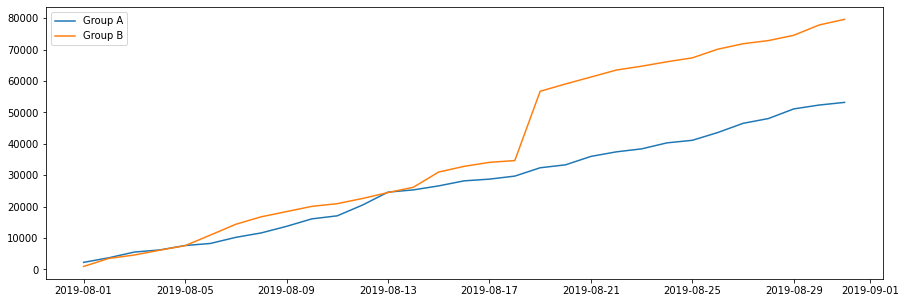

In [31]:
# Dataframe de ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]

# Dataframe de ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]


# Graficamos cada grupo
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B')
plt.legend()



**Conclusiones y conjeturas:**

- Ambos grupos comuenzan de forma muy igualada hasta experimentar una diferencia el día 5 de agosto donde el grupo B pasa a la delantera.
- El 13 de agosto, ante un aumento de los ingresos del grupo A, vuelven a estar igualados pero solo por muy poco ya que el grupo B experimenta un ascenso.
- Si bien el crecimiento para ambos grupos era similar, después del 17 de agosto el grupo B tiene gran aumento para luego sostener el mismo nivel de crecimiento que el grupo A.

**Al parecer algunos pedidos grandes posteriores al 17 de agosto afectaron los resultados. Los ingresos en general sostenían el mismo nivel de crecimiento pero el experimento se vio afectado por estas irrupciones atípicas. Analizaremos posteriormente estos pedidos de gran monto.**

#### Tamaño del pedido acumulado por grupo

Veamos gráficamente las diferencias de cantidad de pedidos por grupo:

Text(0.5, 1.0, 'Tamaño del pedido acumulado por grupo')

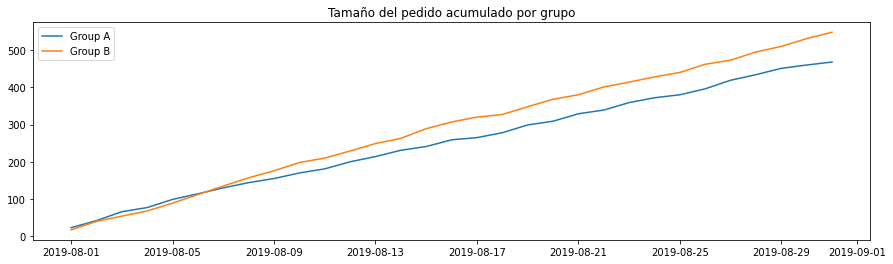

In [32]:
# Graficamos cada grupo
plt.figure(figsize=(15,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='Group B')
plt.legend()

# Título
plt.title('Tamaño del pedido acumulado por grupo')

**Conclusiones y conjeturas:**

- Al igual que con el gráfico de ingresos, la cantidad de pedidos comienza muy igualada y solo luego del 7 de agosto se genera una diferencia que favorece al grupo B en cantidad de pedidos.
- El crecimiento de B se va ampliando levemente pero se mantiene con una diferencia no muy lejana al grupo A.
- El grupo A termina el experimento casi alcanzando los 500 pedidos mientras que el grupo B los supera.

**La cantidad de pedidos no tiene cambios abruptos y los grupos mantienen una diferencia relativamente estable a través del tiempo.**

#### Diferencia relativa del tamaño de pedidos para B en comparación a A

Calcularemos el tamaño promedio de los pedidos (ingreso promedio) para establecer la diferencia relativa entre los grupos. Generaremos un gráfico a partir de esto para establecer sus diferencias.

Text(0.5, 1.0, 'Diferencias de ingresos por orden para grupos A y B')

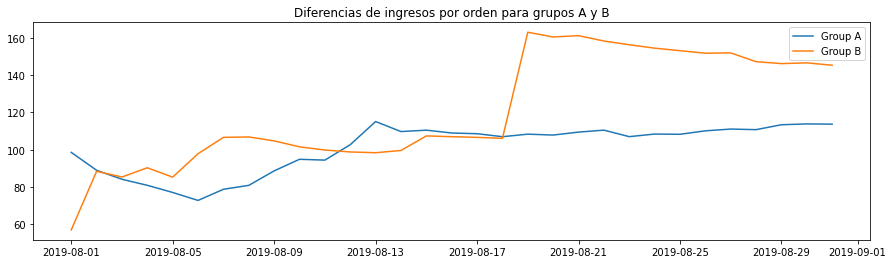

In [33]:
# Ajustamos tamaño del gráfico
plt.figure(figsize=(15,4))

# Gráfico del grupo A
plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='Group A',
)

# Gráfico del grupo B
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='Group B',
)
plt.legend()

# Título
plt.title('Diferencias de ingresos por orden para grupos A y B')

**Conclusiones y conjeturas:**

- El tamaño promedio de pedido para B comienza por debajo del valor de 60, mientras que para A en promedio es cercano a 100.
- Luego del primer día, el grupo B experimenta un alza por lo que supera rápidamente al grupo A el que experimenta un descenso hasta el día 6 de agosto aproximadamente.
- El grupo B tiene un fuerte aumento y logra superar los 100 en promedio desde el 7 de agosto aproximadamente. Luego se mantendría cercano a esa cifra hasta el día 14 aproximadamente donde experimentaría otro leve aumento.
- Por otro lado, el grupo A experimenta un aumento desde el 6 de agosto hasta superar al grupo B para el día 12 de agosto aproximadamente, llegando a un peak el día 13 para después estabilizarse en torno a los 110 en promedio por pedido hasta fin de mes.
- El grupo B, tiene un comportamiento peculiar en el que luego del 17 de agosto, se produce un incremento del promedio en que llega a alcanzar la cifra de 160 aproximadamente para después disminuir levementey mantenerse entre 150 y 140 hacia fin de mes.

**El ingreso promedio acumulado por orden tiene variaciones hasta mediados de mes y luego vemos dos casos: para A se estabiliza en torno al valor de 110 mientras que para B se produce una alteración que lo lleva a tener un promedio cercano a 150 hasta fin de mes. Esta condición tendrá que ser analizada posteriormente.**

Veamos ahora un gráfico de la diferencia relativa del grupo B comparado con el grupo A:


Text(0.5, 1.0, 'Diferencia relativa de ingresos del grupo B con respecto al grupo A')

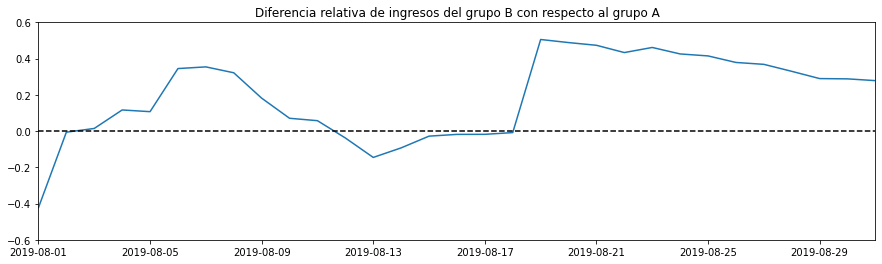

In [34]:
# Unimos las tablas cumulativeRenevueA con cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)


# Ajustamos tamaño del gráfico
plt.figure(figsize=(15,4))

#Generamos el gráfico
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)

# Trazamos una línea punteada como eje X 
plt.axhline(y=0, color='black', linestyle='--')

# Establecemos la escala de los ejes
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.6, 0.6])

# Título
plt.title('Diferencia relativa de ingresos del grupo B con respecto al grupo A')

- El gráfico confirma las situaciones de cambios abruptos y deja aún más claro que existen valores atípícos que es necesario analizar. Anteriormente confirmamos el cambio radical  que se observa luego del 17 de agosto y mediante este gráfico también podemos observar que cercano al 7 de agosto igual corresponde a un cambio significativo que sería bueno revisar.

- Los ingresos por orden del grupo B llegan a superar por un 40% a los del grupó A al finalizar la primera semana.

- Al 13 de agosto disminuye un casi un 20% los ingresos por orden respecto a A, pero luego comienza a subir hasta igualar para el 17 de agosto.

- A partir del 18 de agosto aproximadamente, el ingreso promedio de B es de un 50% más que A. Este valor va disminuyendo hasta alcanzar cifras de 30% mayores que A a fin de mes.


#### Tasa de conversión de la relación de pedidos y visitas

Dejamos de lado por un momento los ingresos por visita para calcular la relación entre la cantidad de pedidos por visitas en el sitio. Para esto calcularemos la tasa de conversión diaria, es decir, por cada cuántas visitas se generó un pedido cada día.

In [35]:
# Agregamos la columna conversion a la tabla cumulativeData
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])

# Generamos dataframes para cada grupo
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Vemos los valores de conversión máximos
print('Valor de conversión máximo en el grupo A: ' + str(cumulativeDataA['conversion'].max()))
print('Valor de conversión máximo en el grupo B: ' + str(cumulativeDataB['conversion'].max()))

Valor de conversión máximo en el grupo A: 0.03581117742810635
Valor de conversión máximo en el grupo B: 0.03169521370257724


La máxima conversión la alcanza el grupo A con una relación de 0.035 pedidos por visitante.

Para efectos del gráfico, fijaremos el límite máximo en 0.04.

Text(0.5, 1.0, 'Tasa de conversión acumulada para ambos grupos')

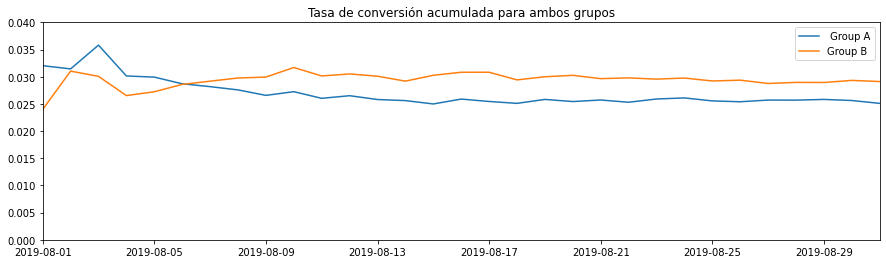

In [36]:
# Ajustamos tamaño del gráfico
plt.figure(figsize=(15,4))

# Trazamos los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label=' Group A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Group B')
plt.legend()

# Establecemos la escala de los ejes
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.04])

# Título
plt.title('Tasa de conversión acumulada para ambos grupos')

**Conclusiones y conjeturas:**

- Al inicio de la prueba, el grupo A tenía una tasa de conversión más alta alcanzando su máximo punto hacia el 3 de agosto aproximadamente.
- Ambos grupos experimentan una leve baja pero es el grupo B quien consigue mejores resultados superando a A hacia el 6 de agosto aproximadamente.
- B se estabiliza en torno al valor medio de conversión de 0.030 mientras que A tiene un leve decaimiento para estabilizarse en torno al 0.025.

**La escala del gráfico nos deja claro que los valores absolutos de fluctuaciones entre el inicio y fin de la prueba no son muy altos.**
 - Para el grupo A de 3.2% a 2.7%
 - Para el grupo B de 2.5% a 3%

Vamos a trazar ahora un gráfico de diferencia relativa para las tasas de conversión acumuladas:

Text(0.5, 1.0, 'Diferencia relativa para la tasa de conversión del grupo B con respecto al grupo A')

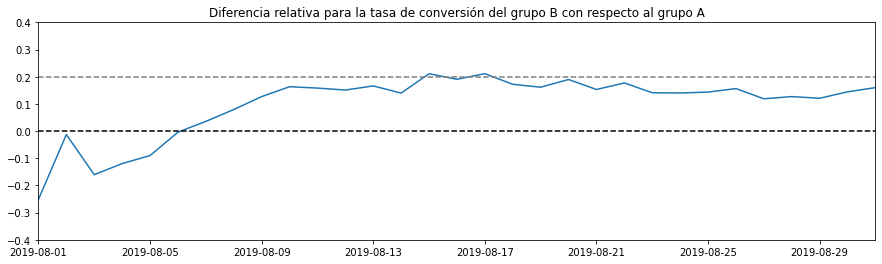

In [37]:
# Unimos los datos acumulados de los grupos
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

# Ajustamos tamaño del gráfico
plt.figure(figsize=(15,4))

# Trazamos los gráficos
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)

# Establecemos líneas punteadas para el eje X y agregamos otra en Y= 0.2
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

#Escala de los ejes
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.4, 0.4])

# Título
plt.title('Diferencia relativa para la tasa de conversión del grupo B con respecto al grupo A')

**Conclusiones y conjeturas:**

- El grupo B comienza con más de un 20% menos de conversión que el grupo A. Logra igualar luego de un par de días pero vuelve a caer solo para superar a A luego de 6 o 7 días.

- Luego de la primera semana de la prueba, el grupo B se consolida con una mejor conversión y se estabiliza casi en un 20% más que el grupo A.

- El punto más alto de conversión respecto a A, lo alcanza a mediados de mes.

De acuerdo a lo explorado hasta el momento, es posible que existan valores atípicos o anomalías que puedan distorsionar nuestros resultados. Para esto, vamos a identificar estos valores atípicos en el número de pedidos y en el precio de estos mismos.

#### Dispersión del número de pedidos por usuario.

Vamos a crear una tabla con la cantidad de ordenes por usuario:

In [38]:
# Creamos un nuevo dataset
ordersByUsers = (
    orders_updated.drop(['group','revenue','date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

# Renombramos las columnas
ordersByUsers.columns = ['userid', 'orders']


Veamos un histograma de distribución de la cantidad de pedidos:

Text(0.5, 1.0, 'Distribución de cantidad de pedidos')

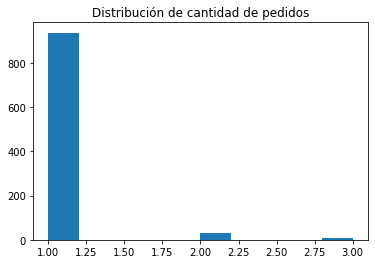

In [39]:
# Graficamos histograma
plt.hist(ordersByUsers['orders'])

# Título
plt.title('Distribución de cantidad de pedidos')

**Efectivamente, la cantidad de 2 y 3 pedidos parece ser algo bastante atípico.**

Veamos otro gráfico para aclarar la cantidad de usuarios que corresponde a estos pedidos.

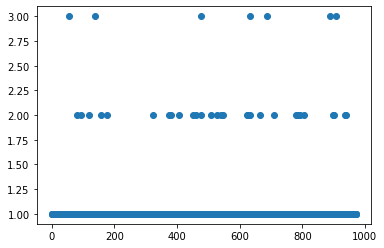

In [40]:
# Rango de números desde 0 hasta el número de observaciones en ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Solo tenemos 7 usuarios que realizaron 3 pedidos y los que realizan dos pueden ser el doble aproximadamente. De acuerdo a estos resultados, que un usuario realice 2 o 3 pedidos podría considerarse atípico.

Veamos a qué percentil corresponden esta cantidad de usuarios, ya que al estar entre el 5% más extremo, podríamos considerar eliminarlos.

**Cálculo de percentiles para el número de pedidos por usuario:**

Calcularemos los percentiles 90, 95 y 99 para ver a partir de qué valor podríamos considerar los valores extremos.

In [41]:
# Cálculo de percentiles
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

**El resultado es claro. No más del 1% realizó más de dos pedidos, por lo tanto, los usuarios que realizaron 2 o 3 pedidos son consideradas anomalías.**

#### Dispersión del precio de los pedidos

Veamos la distribución de los precios a través de un histograma:

Text(0.5, 1.0, 'Distribución de precios de los pedidos')

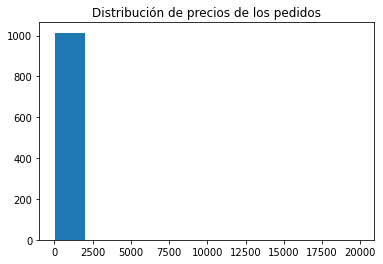

In [42]:
# Graficamos histograma
plt.hist(orders_updated['revenue'])

# Título
plt.title('Distribución de precios de los pedidos')

La mayoría de los pedidos tiene un monto bajo los 2500. Probemos con otro gráfico para ver con mayor claridad.

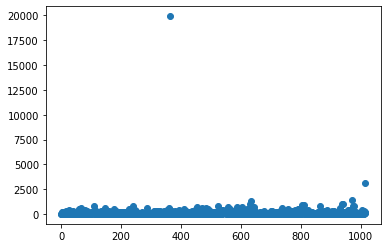

In [43]:
# Rango de números desde 0 hasta el número de observaciones en orders_updated
x_values = pd.Series(range(0,len(orders_updated['revenue'])))
plt.scatter(x_values, orders_updated['revenue'])

Existen dos pedidos sobre el valor de 2500, uno cercano a este valor y otro que alcanza los 20000. Definitivamente este último es un valor anómalo que afecta a nuestros datos.

Calculamos los percentiles para determinar desde qué valor podemos considerarlos atípicos.

**Cálculo de percentiles para el monto de ingreso por pedido:**

Calculamos los percentiles 90, 95 y 99 para establecer los montos de ingresos que pueden considerarse como anómalos.

In [44]:
# Cálculo de percentiles
np.percentile(orders_updated['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

Los percentiles nos muestran datos interesantes a considerar:

**- No más del 5% de usuarios realizaron pedidos que costaron más de 415.**

**- No más del 1% de usuarios realizaron pedidos más caros que 830.**

Ya encontramos los valores atípicos tanto para el número de pedidos como para el monto de estos mismos, por lo tanto, ahora vamos a buscar la significancia estadística de las diferencias en la tasa de conversión y el tamaño de los pedidos entre los grupos utilizando los datos "sin procesar", es decir, antes de eliminar las anomalías que detectamos.

#### Significancia estadística para las diferencias en la conversión

Con anterioridad creamos la variable "ordersByUsers" para calcular el número de órdenes por usuario; ahora haremos lo mismo pero separado en grupos A y B.

In [45]:
# órdenes para usuarios del grupo A
ordersByUsersA = (
    orders_updated[orders_updated['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

# Cambiamos los nombres de las columnas
ordersByUsersA.columns = ['userId', 'orders']

# órdenes para usuarios del grupo B
ordersByUsersB = (
    orders_updated[orders_updated['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

# Cambiamos los nombres de las columnas
ordersByUsersB.columns = ['userId', 'orders']

Ahora, preparamos las muestras para la prueba de Mann-Whitney.

En esta prueba, clasificaremos dos muestras en orden ascendente para comparar los rangos de valores que aparecen en ambas muestras (posición en la que aparecen). Si las diferencias entre sus rangos son las mismas de una a otra muestra, el cambio será *típico* (se agregaron valores lo que provoca que el resto cambie). De resultar un cambio *no típico*, se trataría de un cambio real. La diferencia de estos rangos se establece como valor del criterio, y mientras mayor sea este valor, mayor será la probabilidad de que las distribuciones difieran. 

In [46]:
# Declaramos las muestras como sampleA y sampleB con usuarios de diferentes grupos y sus nros de pedidos correspondientes
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_updated[visits_updated['group'] == 'A']['visits_updated'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
    
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_updated[visits_updated['group'] == 'B']['visits_updated'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Vamos a obtener la significancia estadística de la diferencia en la conversión basada en los resultados después de un mes de prueba. Mostrarémos el valor p redondeado a 5 decimales para comparar la conversión de los grupos:

In [47]:
# Prueba de Mann-whitney
'{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.01096'

*Consideramos nuestro nivel de significancia en 0.05*

**De acuerdo a la prueba de Mann-Whitney, tenemos de resultado el valor de: 0.01096.**

- El valor p de la prueba es inferior a nuestro nivel de significancia (0.05) por lo que rechazamos la hipótesis nula.
- El análisis de los datos sin procesar demuestra que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas

Calculemos la diferencia relativa en la conversión entre estos grupos:

In [48]:
# Diferencia relativa redondeada a tres decimales
'{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)

'0.160'

- **Existe una ganancia de conversión relativa del grupo B en comparación al grupo A del 16%.** Lo que indica que si existen diferencias considerables entre los grupos.


Ahora, pasamos a analizar los tamaños promedio de los pedidos de los datos sin procesar para luego comparar estas métricas con los valores atípicos eliminados.

#### Significancia estadística para las diferencias en el tamaño promedio de los pedidos

Procedemos a realizar los cálculos para la prueba Mann-Whitney:

In [49]:
# Prueba con 3 decimales
'{0:.3f}'.format(
    stats.mannwhitneyu(
        orders_updated[orders_updated['group'] == 'A']['revenue'],
        orders_updated[orders_updated['group'] == 'B']['revenue'],
    )[1]
)

'0.862'

*Consideramos nuestro nivel de significancia en 0.05*

**De acuerdo a la prueba de Mann-Whitney, nuestro valor p es: 0.862**

- El valor p es muy superior al nivel de significancia, por lo tanto, no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos.

Veamos si existe una diferencia relativa significativa:

In [50]:
# Diferencia relativa redondeada a 3 decimales
'{0:.3f}'.format(
    orders_updated[orders_updated['group'] == 'B']['revenue'].mean()
    / orders_updated[orders_updated['group'] == 'A']['revenue'].mean()
    - 1
)

'0.278'

Si bien no existen diferencias estadísticamente significaticas de acuerdo a la prueba de Mann-Whitney, **la diferencia relativa de sus medias es de un 27,8%** lo cual es una cifra bastante alta; lo que indica claramente que existen valores que elevan bastante la media del grupo B respecto al grupo A.

Ahora, vamos a eliminar las anomalías de nuestros datos en base a las conclusiones de las pruebas recientes.

#### Criterios usados para datos anómalos

Anteriormente realizamos el cálculo de percentiles para el tamaño promedio de los pedidos y para la cantidad de pedidos por usuario. Recordamos los datos obtenidos para los percentiles 95 y 99 ya que consideramos que el 5% más extremo se encuentra en los datos a eliminar:

**Tamaño de pedido promedio**
- Percentil 95: Mayor o igual a 415
- Percentil 99: Mayor o igual a 830

**Número de pedidos de usuarios**
- Percentil 95: Mayor o igual a 1
- Percentil 99: Mayor o igual a 2


De acuerdo a estos valores, definimos los datos anómalos de la siguiente manera:

**Consideramos como usuarios anómalos a aquellos que realizaron 2 o más pedidos o quienes realizaron uno de un valor de más de 500.** Con estas medidas estaremos eliminando el 1% de usuarios con más pedidos y entre el 1% y 5%  de los pedidos más caros.

Crearemos slices de datos para usuarios con 2 o más pedidos y usuarios con pedidos de más de 500. Luego uniremos estos datos para crear una tabla de usuarios anómalos.

In [51]:
# Usuarios con 2 o más pedidos
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)

# Usuarios con pedidos de un valor mayor a 500
usersWithExpensiveOrders = orders_updated[orders_updated['revenue'] > 500]['visitorid']

# Tabla con usuarios anómalos
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Mostramos la cantidad de usuarios en la lista
abnormalUsers.shape

(72,)

**Existen 72 usuarios que tienen valores anómalos.**

#### Significancia estadística para las diferencias en la conversión con datos filtrados

Vamos a crear variables para los datos filtrados:

In [52]:
# Muestra de grupo A filtrada
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_updated[visits_updated['group'] == 'A']['visits_updated'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Muestra de grupo B filtrada
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_updated[visits_updated['group'] == 'B']['visits_updated'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Aplicamos el criterio estadístico de Mann-Whitney:

In [53]:
# Ajustamos a 5 decimales
"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.00961'

*Valor de significancia considerado: 0.05*

**Al igual que los datos sin filtrar, nuestro nuevo valor P es menor al nivel de significación, por lo tanto, se demuestra que las tasas de conversión entre los grupos A y B si tienen diferencias estadísticas significativas.**

Veamos la diferencia relativa entre los grupos:

In [54]:
# Diferencia relativa redondeada a tres decimales
"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)

'0.186'

**La ganancia relativa del grupo B respecto al grupo A en cuanto a la tasa de conversión es de un 18,6%.**

**Esto demuestra que el grupo B es mejor que el grupo A.**

Veamos que sucede respecto al tamaño promedio de los pedidos ahora con los datos filtrados.

#### Significancia estadística para las diferencias en el tamaño promedio de los pedidos con datos filtrados

In [55]:
# Prueba de Mann-Whitney con 3 decimales
"{0:.3f}".format(
    stats.mannwhitneyu(
        orders_updated[
            np.logical_and(
                orders_updated['group'] == 'A',
                np.logical_not(orders_updated['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'],
        orders_updated[
            np.logical_and(
                orders_updated['group'] == 'B',
                np.logical_not(orders_updated['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'],
    )[1]
)

'0.992'

*Consideramos nuestro nivel de significancia en 0.05*

**De acuerdo a la prueba de Mann-Whitney, nuestro valor p es: 0.992**

- El valor p es muy superior al nivel de significancia, por lo tanto, y al igual que con los datos sin filtrar, no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos.


Veamos la diferencia relativa de los datos filtrados:

In [56]:
# Diferencia relativa redondeada a 3 decimales
"{0:.3f}".format(
    orders_updated[
        np.logical_and(
            orders_updated['group'] == 'B',
            np.logical_not(orders_updated['visitorid'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    / orders_updated[
        np.logical_and(
            orders_updated['group'] == 'A',
            np.logical_not(orders_updated['visitorid'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    - 1
)

'0.016'

**La diferencia relativa del tamaño medio de compras disminuyó de un 27,8% a un 1,6%.** 

**Con los datos filtrados se redujo la diferencia de tamaño medio de las compras del grupo B respecto del grupo A. Ahora la media de compras para B solo supera en un 1,6% a las del grupo A.**

#### Decisión basada en los resultados de la prueba.                                                                                        

Mostramos el resumen del resultado de las pruebas anteriores que influirán en la toma de decisiones:

**Tasa de conversión de datos en bruto:**

- *Prueba de Mann-Whitney:* valor p de 0.01096.

- *Diferencia relativa:* Ganancia de conversión relativa del 16% de B por sobre A.

- *Conclusiones:* La hipótesis nula en la prueba de Mann-Whitney queda rechazada y se demuestra que las tasas de conversión de los grupos A y B tienen diferencias estadísticamente significativas. Esto queda confirmado por la ganancia relativa en conversión del 16% del grupo B por sobre el A. 


**Tamaño promedio de los pedidos en bruto:**

- *Prueba de Mann-Whitney:* valor p de 0.862

- *Diferencia relativa:* Ganancia de tamaño promedio relativo del 27,8% de B por sobre A.

- *Conclusiones:* Dado el valor p muy superior al nivel de significancia, se demuestra que no existen diferencias estadísticamente significativas para este caso. A pesar de esto, la diferencia relativa del valor medio de los pedidos es de un 27,8% más para los pedidos de B que los de A, demostrando que existen valores atípicos que elevan bastante la media del grupo B.


**Tasa de conversión con datos filtrados:**

- *Prueba de Mann-Whitney:* valor p de 0.00961

- *Diferencia relativa:* Ganancia de conversión relativa del 18,6% de B por sobre A.

- *Conclusiones:* Al igual que con los datos en bruto, el valor p es menor al nivel de significación lo que confirma que las tasas de conversión de los grupos A y B tienen diferencias estadísticamente significativas. La diferencia relativa de la tasa de conversión ahora aumenta de 16% a 18,6% en favor del grupo B. Se demuestra que B presenta mejores resultados que A.


**Tamaño promedio de los pedidos con datos filtrados:**

- *Prueba de Mann-Whitney:* valor p de 0.992

- *Diferencia relativa:* Ganancia de tamaño promedio relativo del 1,6% de B por sobre A.

- *Conclusiones:* Al igual que con los datos en bruto, de acuerdo a el valor p muy superior al nivel de significancia, se demuestra que no existen diferencias estadísticamente significativas para este caso. Los datos filtrados permitieron que la diferencia relativa del tamaño promedio de los pedidos disminuyera de un 27,8% a un 1,6%.

**Conclusiones respecto a la prueba A/B:**

- Hay diferencias significativas en las tasas de conversión de los grupos. Después de eliminar anomalías, la brecha aumenta levemente a favor del grupo B; por lo tanto, el grupo B demuestra tener una mejor conversión de visitantes a compradores en la prueba.


- En cuanto al tamaño promedio de los pedidos, las pruebas estadísticas demuestran que no hay mayor diferencia en los promedios, pero si, la diferencia relativa es alta en los datos en bruto. Al eliminar las anomalías se disminuyen casi totalmente estas diferencias lo que da a entender que la diferencia de tamaño promedio solo estaba dado por unos pocos valores atípicos. 

Recordemos algunos gráficos para confirmar los resultados:
<img src=https://i.ibb.co/9GtqsB8/tasaconversion.png>

**La tasa de conversión del grupo B respecto al grupo A demuestra ser superior y estable luego de la primera semana de prueba. Si bien hay unas leves bajas después de mitad de mes, se experimentan subidas que estabilizan el nivel de conversión.**

En cuanto a los tamaños promedios de compra, tenemos la siguiente situación de B respecto a A:

<img src=https://i.ibb.co/ZJZyJgM/ingresospromedio.png>

**El grupo B muestra ciertos picos de aumento lo que está influenciado por datos anómalos. Si bien, existen estas alteraciones, los datos tienden a igualarse como se demuestra a mediados de mes o en la curva en descenso luego de la tercera semana. Aún así, no se pueden sacar conclusiones definitivas de este gráfico.**

Basado en todos estos hechos, podemos concluir que **la prueba fue exitosa y debe pararse.** La probabilidad de que el grupo A sea mejor que el B es casi inexistente ya ya que el amplio márgen de conversión a favor del grupo B ha sido estable a través del tiempo. Los tamaños promedios de compra son muy similares eliminando los datos anómalos; y aún en este escenario, el grupo B aumenta su capacidad de conversión respecto a A.

**El grupo B tiene un leve mejor promedio de tamaño de compra y una capacidad de transformar visitantes en clientes de casi un 20% superior.**

## Conclusiones finales

**Respecto a la priorización de hipótesis:**

Al comienzo de este análisis se trabajó en la priorización de hipótesis. Disponíamos de nueve hipótesis que establecen formas de mejorar los ingresos para la compañía. Para esto, usamos distintos criterios y métricas para elegir la más apropiada a priorizar; entre ellos el framework ICE y RICE, los cuales en su conjunto dieron por ganadora a la octava hipótesis como mejor opción:

"*Añadir un formulario de suscripción a todas las páginas principales*"

Debido a sus buenos parámetros generales y un esfuerzo de recursos medio, se perfila como la primera candidata.


**Respecto al Test A/B:**

Corregimos un error en los dataset en el cual se presentaron usuarios que estaban tanto en el grupo A como en el B. Se eliminaron 181 registros correspondientes a estos 58 usuarios duales.

Se trabajó en los datos de una prueba hecha durante todo el mes de agosto de 2019:

- Analizamos gráficamente los datos acumulados
- Observamos las diferencias relativas entre los grupos
- Se exploró la dispersión de los datos para detectar anomalías

Luego de esto, se procedió a calcular la significancia estadística de acuerdo al criterio de Mann-Whitney para determinar el grupo que tenga los mejores resultados. Esto se aplicó para los datos en bruto como para los datos filtrados (sin valores atípicos) y las conclusiones fueron evidentes:

**El grupo B muestra mejores resultados que A debido a una tasa de conversión relativa superior por casi un 20% que se mantiene constante a través del tiempo y una leve mejora en el tamaño de compra. Por lo tanto, la prueba fue exitosa y debe pararse.**